Q1. What is the mathematical formula for a linear SVM?

A linear Support Vector Machine (SVM) aims to find the hyperplane that best separates the data into different classes. The mathematical formula for a linear SVM is:
f(x)=w^Tx+b

where:

- w is the weight vector,
- x is the input vector,
- b is the bias term.


Q2. What is the objective function of a linear SVM?

The objective function of a linear SVM can be expressed as:

min(w,b) 1/2 ∥w∥^2+C∑ ξi

subject to the constraints:
yi(w^T xi+b)≥1−ξi ,ξi ≥0

where:

- 𝐶 is the regularization parameter,
- ξi are the slack variables for handling misclassifications,
- yi are the labels of the data points,
- n is the number of data points.

Q3. What is the kernel trick in SVM?

The kernel trick allows SVMs to solve non-linear classification problems by mapping the original feature space into a higher-dimensional space where a linear separator can be found. This is done implicitly using a kernel function 
K(xi,xj), which computes the dot product of the mapped features without explicitly performing the transformation.

Q4. What is the role of support vectors in SVM Explain with example

Support vectors are the data points that lie closest to the decision boundary (hyperplane). These points are crucial because they determine the position and orientation of the hyperplane. The support vectors are the only points that influence the final model, and the margin is maximized based on these points.

Example: Consider a simple binary classification problem with two features. The support vectors are the data points nearest to the separating hyperplane. If you move a support vector, the hyperplane will shift accordingly. However, moving other points that are not support vectors won't affect the hyperplane.

Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
SVM?

Let's illustrate these concepts with graphs.

Hyperplane and Marginal Plane
A hyperplane is the decision boundary separating different classes, and the marginal planes are the boundaries that are parallel to the hyperplane and pass through the support vectors.

Soft Margin vs. Hard Margin
- Hard Margin: Requires that all data points are correctly classified and are outside the margin. This is only possible if the data is linearly separable without any misclassifications.
- Soft Margin: Allows some misclassifications and is used to handle cases where the data is not perfectly linearly separable. The parameter 
C controls the trade-off between maximizing the margin and minimizing the classification error.

Q6. SVM Implementation through Iris dataset.



In [6]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]  # Only take the first two features for visualization
y = iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
from sklearn.svm import SVC

# Train a linear SVM classifier
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = model.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8


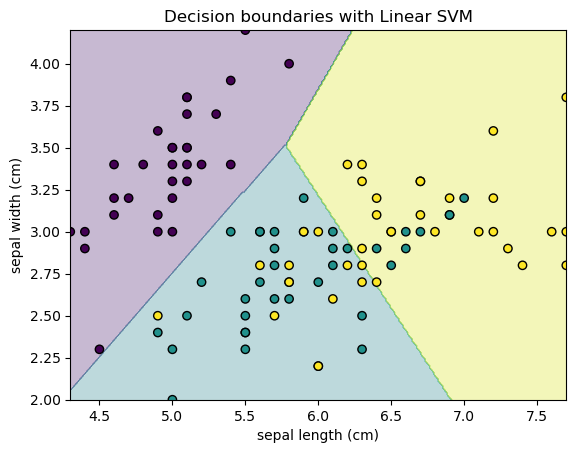

In [7]:
# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_xlim(X[:, 0].min(), X[:, 0].max())
    ax.set_ylim(X[:, 1].min(), X[:, 1].max())

fig, ax = plt.subplots()
plot_decision_boundaries(X_train, y_train, model, ax)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Decision boundaries with Linear SVM')
plt.show()


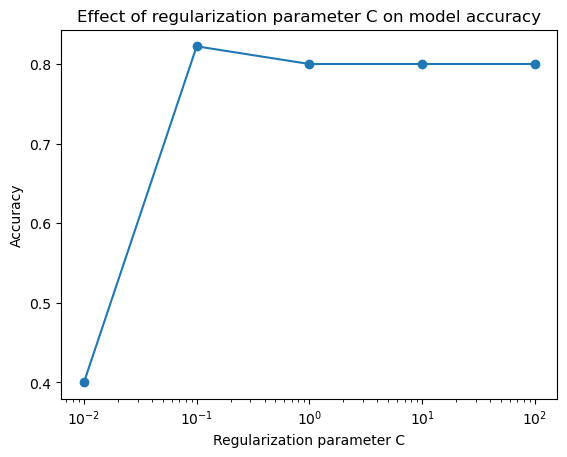

In [8]:
# Trying different values of C
C_values = [0.01, 0.1, 1, 10, 100]
accuracies = []

for C in C_values:
    model = SVC(kernel='linear', C=C)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(C_values, accuracies, marker='o')
plt.xscale('log')
plt.xlabel('Regularization parameter C')
plt.ylabel('Accuracy')
plt.title('Effect of regularization parameter C on model accuracy')
plt.show()
